In [9]:
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import librosa,librosa.display
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 


In [2]:
cd F:\BTP

F:\BTP


We removed silences from the audio files with an application.

"bef_rem" is the original dataset of audiofiles.

"aft_rem" is the dataset of audio files after the silence is removed.


In [3]:
import os
bef_rem=os.listdir('DataSets/wav')
aft_rem=os.listdir('remov/wav')

Let's see if the silence is removed from the audio files

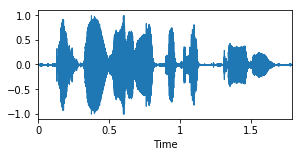

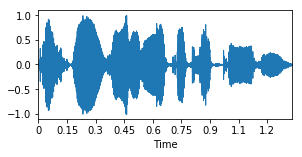

In [4]:
audio_path_bef = 'Datasets/wav/08a02Na.wav'
x , sr = librosa.load(audio_path_bef)
#plt.axis([0, 3, -1, 1])
plt.figure(figsize=(10,2))

plt.subplot(121)
librosa.display.waveplot(x, sr=sr)

audio_path_aft= 'remov/wav/08a02Na.wav'
x , sr = librosa.load(audio_path_aft)
#plt.axis([0, 3, -1, 1])
plt.figure(figsize=(10,2))

plt.subplot(122)
librosa.display.waveplot(x, sr=sr)

We can see clearly form the above plots that the silence is removed within the audiofile.

Let's extract mfcc values from each audio file and its emotion and store them.

_x stores mfccs and _y stores emotions from each audio files in before and after 

In [125]:
mfcc_size = 120
bef_x = np.zeros((len(bef_rem),mfcc_size))
bef_y = np.zeros((len(bef_rem),7),dtype = int)
#bef_x stores the audio files' mfcc
#bef_y stores emotions

code = {
    'W':0, #anger
    'L':1, #boredom
    'E':2, #disgust
    'A':3, #fear
    'F':4, #happy
    'T':5, #sad
    'N':6  #neutral
}
for i in range(len(bef_rem)):
    X, sample_rate = librosa.load('DataSets/wav/'+bef_rem[i], res_type='kaiser_fast')
    bef_y[i][code[bef_rem[i][5]]] = 1  
    bef_x[i] = np.resize(np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=mfcc_size).T,axis=0),(1,mfcc_size))

aft_x = np.zeros((len(aft_rem),mfcc_size))
aft_y = np.zeros((len(aft_rem),7),dtype = int)

#aft_x stores the mfcc after the removal of silences
#aft_y stores emotions

for i in range(len(aft_rem)):
    X, sample_rate = librosa.load('remov/wav/'+aft_rem[i], res_type='kaiser_fast')
    aft_y[i][code[aft_rem[i][5]]] = 1
    aft_x[i] = np.resize(np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=mfcc_size).T,axis=0),(1,mfcc_size))

Now, categorize the datasets of respective emotions

In [126]:
angry_indices = list(np.where(bef_y[:,0]==1)[0])
bef_angry_x = np.zeros((len(angry_indices),mfcc_size))
bef_angry_y = np.zeros((len(angry_indices),7),dtype=int)
aft_angry_x = np.zeros((len(angry_indices),mfcc_size))
aft_angry_y = np.zeros((len(angry_indices),7),dtype=int)
for i in range(len(angry_indices)):
    bef_angry_x[i] = np.resize(bef_x[angry_indices[i]],(1,mfcc_size))
    bef_angry_y[i] = np.resize(bef_y[angry_indices[i]],(1,7))
    aft_angry_x[i] = np.resize(aft_x[angry_indices[i]],(1,mfcc_size))
    aft_angry_y[i] = np.resize(aft_y[angry_indices[i]],(1,7))

boredom_indices = list(np.where(bef_y[:,1]==1)[0])
bef_boredom_x = np.zeros((len(boredom_indices),mfcc_size))
bef_boredom_y = np.zeros((len(boredom_indices),7),dtype=int)
aft_boredom_x = np.zeros((len(boredom_indices),mfcc_size))
aft_boredom_y = np.zeros((len(boredom_indices),7),dtype=int)
for i in range(len(boredom_indices)):
    bef_boredom_x[i] = np.resize(bef_x[boredom_indices[i]],(1,mfcc_size))
    bef_boredom_y[i] = np.resize(bef_y[boredom_indices[i]],(1,7))
    aft_boredom_x[i] = np.resize(aft_x[boredom_indices[i]],(1,mfcc_size))
    aft_boredom_y[i] = np.resize(aft_y[boredom_indices[i]],(1,7))

disgust_indices = list(np.where(bef_y[:,2]==1)[0])
bef_disgust_x = np.zeros((len(disgust_indices),mfcc_size))
bef_disgust_y = np.zeros((len(disgust_indices),7),dtype=int)
aft_disgust_x = np.zeros((len(disgust_indices),mfcc_size))
aft_disgust_y = np.zeros((len(disgust_indices),7),dtype=int)
for i in range(len(disgust_indices)):
    bef_disgust_x[i] = np.resize(bef_x[disgust_indices[i]],(1,mfcc_size))
    bef_disgust_y[i] = np.resize(bef_y[disgust_indices[i]],(1,7))
    aft_disgust_x[i] = np.resize(aft_x[disgust_indices[i]],(1,mfcc_size))
    aft_disgust_y[i] = np.resize(aft_y[disgust_indices[i]],(1,7))

fear_indices = list(np.where(bef_y[:,3]==1)[0])
bef_fear_x = np.zeros((len(fear_indices),mfcc_size))
bef_fear_y = np.zeros((len(fear_indices),7),dtype=int)
aft_fear_x = np.zeros((len(fear_indices),mfcc_size))
aft_fear_y = np.zeros((len(fear_indices),7),dtype=int)
for i in range(len(fear_indices)):
    bef_fear_x[i] = np.resize(bef_x[fear_indices[i]],(1,mfcc_size))
    bef_fear_y[i] = np.resize(bef_y[fear_indices[i]],(1,7))
    aft_fear_x[i] = np.resize(aft_x[fear_indices[i]],(1,mfcc_size))
    aft_fear_y[i] = np.resize(aft_y[fear_indices[i]],(1,7))

happy_indices = list(np.where(bef_y[:,4]==1)[0])
bef_happy_x = np.zeros((len(happy_indices),mfcc_size))
bef_happy_y = np.zeros((len(happy_indices),7),dtype=int)
aft_happy_x = np.zeros((len(happy_indices),mfcc_size))
aft_happy_y = np.zeros((len(happy_indices),7),dtype=int)
for i in range(len(happy_indices)):
    bef_happy_x[i] = np.resize(bef_x[happy_indices[i]],(1,mfcc_size))
    bef_happy_y[i] = np.resize(bef_y[happy_indices[i]],(1,7))
    aft_happy_x[i] = np.resize(aft_x[happy_indices[i]],(1,mfcc_size))
    aft_happy_y[i] = np.resize(aft_y[happy_indices[i]],(1,7))

sad_indices = list(np.where(bef_y[:,5]==1)[0])
bef_sad_x = np.zeros((len(sad_indices),mfcc_size))
bef_sad_y = np.zeros((len(sad_indices),7),dtype=int)
aft_sad_x = np.zeros((len(sad_indices),mfcc_size))
aft_sad_y = np.zeros((len(sad_indices),7),dtype=int)
for i in range(len(sad_indices)):
    bef_sad_x[i] = np.resize(bef_x[sad_indices[i]],(1,mfcc_size))
    bef_sad_y[i] = np.resize(bef_y[sad_indices[i]],(1,7))
    aft_sad_x[i] = np.resize(aft_x[sad_indices[i]],(1,mfcc_size))
    aft_sad_y[i] = np.resize(aft_y[sad_indices[i]],(1,7))

neutral_indices = list(np.where(bef_y[:,6]==1)[0])
bef_neutral_x = np.zeros((len(neutral_indices),mfcc_size))
bef_neutral_y = np.zeros((len(neutral_indices),7),dtype=int)
aft_neutral_x = np.zeros((len(neutral_indices),mfcc_size))
aft_neutral_y = np.zeros((len(neutral_indices),7),dtype=int)
for i in range(len(neutral_indices)):
    bef_neutral_x[i] = np.resize(bef_x[neutral_indices[i]],(1,mfcc_size))
    bef_neutral_y[i] = np.resize(bef_y[neutral_indices[i]],(1,7))
    aft_neutral_x[i] = np.resize(aft_x[neutral_indices[i]],(1,mfcc_size))
    aft_neutral_y[i] = np.resize(aft_y[neutral_indices[i]],(1,7))


Lets divide the dataset into test/train/split as 60/10/30 and create a 3 layered dnn model with 128-256-128 nodes.

model_a is for the dataset after the removal of silence.

model_b is for the dataset before the removal of silemce(original audio).

In [128]:
from sklearn.model_selection import train_test_split


In [129]:
Xb_train1, Xb_test, yb_train1, yb_test = train_test_split(bef_x, bef_y, test_size=0.3, random_state=42)
Xb_train, Xb_valid, yb_train, yb_valid = train_test_split(Xb_train1, yb_train1, test_size=0.15, random_state=42)

tf.random.set_seed(7)


num_labels = 7
filter_size = 2

model_b = Sequential()

model_b.add(Dense(128, input_shape=(mfcc_size,)))
model_b.add(Activation('relu'))
model_b.add(Dropout(0.5))

model_b.add(Dense(256))
model_b.add(Activation('relu'))
model_b.add(Dropout(0.5))

model_b.add(Dense(128))
model_b.add(Activation('relu'))
model_b.add(Dropout(0.5))

model_b.add(Dense(num_labels))
model_b.add(Activation('softmax'))

model_b.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history_b = model_b.fit(Xb_train, yb_train, batch_size=30, epochs=200, validation_data=(Xb_valid,yb_valid))

Epoch 1/200
11/11 [==============================] - 0s 34ms/step - loss: 31.7383 - accuracy: 0.1798 - val_loss: 10.7603 - val_accuracy: 0.2321
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 22.7566 - accuracy: 0.1703 - val_loss: 3.4329 - val_accuracy: 0.2500
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 15.8238 - accuracy: 0.1893 - val_loss: 2.1707 - val_accuracy: 0.2500
Epoch 4/200
11/11 [==============================] - 0s 4ms/step - loss: 11.5159 - accuracy: 0.1735 - val_loss: 1.9608 - val_accuracy: 0.2143
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 7.7081 - accuracy: 0.1924 - val_loss: 1.8739 - val_accuracy: 0.1786
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 6.1070 - accuracy: 0.1577 - val_loss: 1.8386 - val_accuracy: 0.2679
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 5.1501 - accuracy: 0.1861 - val_loss: 1.8039 - val_accuracy: 0.3393
Epoch 8

In [130]:
from sklearn.metrics import accuracy_score
predict_yb= model_b.predict(Xb_test)
predicted_test_b = predict_yb
np.where(np.argmax(predict_yb[:]),1,0)
for i in range(len(predict_yb)):
    temp = np.argmax(predict_yb[i])
    
    predict_yb[i] = np.zeros((1,7))
    predict_yb[i][temp] = 1
bef_acc=accuracy_score(yb_test,predict_yb)
print("Accuracy of the dnn model after removing the silences: ",round(bef_acc*100,3),"%")

Accuracy of the dnn model after removing the silences:  66.25 %


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


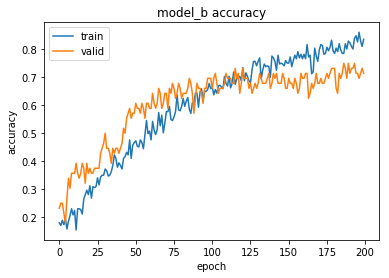

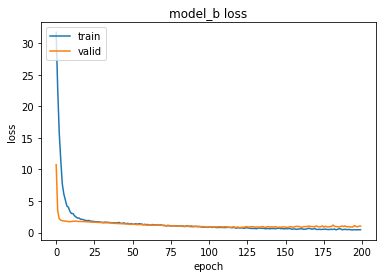

In [153]:
print(history_b.history.keys())
# summarize history_b for accuracy
plt.plot(history_b.history['accuracy'])
plt.plot(history_b.history['val_accuracy'])
plt.title('model_b accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history_b for loss
plt.plot(history_b.history['loss'])
plt.plot(history_b.history['val_loss'])
plt.title('model_b loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [132]:
Xa_train1, Xa_test, ya_train1, ya_test = train_test_split(aft_x, aft_y, test_size=0.3, random_state=42)
Xa_train, Xa_valid, ya_train, ya_valid = train_test_split(Xa_train1, ya_train1, test_size=0.15, random_state=42)


tf.random.set_seed(7)

num_labels = 7

model_a = Sequential()

model_a.add(Dense(128, input_shape=(mfcc_size,)))
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))

model_a.add(Dense(256))
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))

model_a.add(Dense(128))
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))

model_a.add(Dense(num_labels))
model_a.add(Activation('softmax'))

model_a.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


history_a=model_a.fit(Xa_train, ya_train, batch_size=30, epochs=200, validation_data=(Xa_valid,ya_valid))


Epoch 1/200
11/11 [==============================] - 0s 18ms/step - loss: 27.6947 - accuracy: 0.1703 - val_loss: 9.3484 - val_accuracy: 0.2500
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 20.1367 - accuracy: 0.1703 - val_loss: 3.8063 - val_accuracy: 0.3036
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 13.7193 - accuracy: 0.1830 - val_loss: 2.2473 - val_accuracy: 0.3214
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 9.6973 - accuracy: 0.1861 - val_loss: 1.9358 - val_accuracy: 0.2679
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 7.0251 - accuracy: 0.2303 - val_loss: 1.9015 - val_accuracy: 0.2857
Epoch 6/200
11/11 [==============================] - 0s 6ms/step - loss: 5.2859 - accuracy: 0.2177 - val_loss: 1.8613 - val_accuracy: 0.2321
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 4.4731 - accuracy: 0.2208 - val_loss: 1.8038 - val_accuracy: 0.2679
Epoch 8/2

Checking the accuracy of the model_a

In [133]:

predict_ya = model_a.predict(Xa_test)
predicted_test_a = predict_ya
np.where(np.argmax(predict_ya[:]),1,0)
for i in range(len(predict_ya)):
    temp = np.argmax(predict_ya[i])
    predict_ya[i] = np.zeros((1,7))
    predict_ya[i][temp] = 1
aft_acc=accuracy_score(ya_test,predict_ya)
print("Accuracy of the dnn model after removing the silences: ",round(aft_acc*100,3),"%")

Accuracy of the dnn model after removing the silences:  58.125 %


Same with model_b with the Dataset before silence removal

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


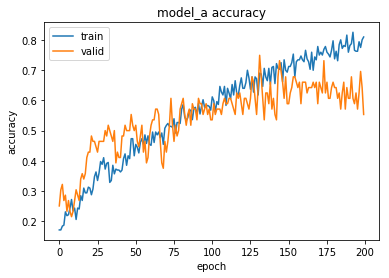

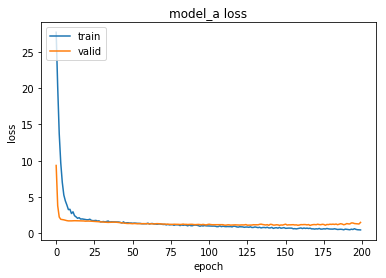

In [155]:
print(history_a.history.keys())
# summarize history_a for accuracy
plt.plot(history_a.history['accuracy'])
plt.plot(history_a.history['val_accuracy'])
plt.title('model_a accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history_b for loss
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('model_a loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [135]:
angry_indices_test = list(np.where(yb_test[:,0]==1)[0])
bef_angry_xt = np.zeros((len(angry_indices_test),mfcc_size))
bef_angry_yt = np.zeros((len(angry_indices_test),7),dtype=int)
aft_angry_xt = np.zeros((len(angry_indices_test),mfcc_size))
aft_angry_yt = np.zeros((len(angry_indices_test),7),dtype=int)
for i in range(len(angry_indices_test)):
    bef_angry_xt[i] = np.resize(Xb_test[angry_indices_test[i]],(1,mfcc_size))
    bef_angry_yt[i] = np.resize(yb_test[angry_indices_test[i]],(1,7))
    aft_angry_xt[i] = np.resize(Xa_test[angry_indices_test[i]],(1,mfcc_size))
    aft_angry_yt[i] = np.resize(ya_test[angry_indices_test[i]],(1,7))

boredom_indices_test = list(np.where(yb_test[:,1]==1)[0])
bef_boredom_xt = np.zeros((len(boredom_indices_test),mfcc_size))
bef_boredom_yt = np.zeros((len(boredom_indices_test),7),dtype=int)
aft_boredom_xt = np.zeros((len(boredom_indices_test),mfcc_size))
aft_boredom_yt = np.zeros((len(boredom_indices_test),7),dtype=int)
for i in range(len(boredom_indices_test)):
    bef_boredom_xt[i] = np.resize(Xb_test[boredom_indices_test[i]],(1,mfcc_size))
    bef_boredom_yt[i] = np.resize(yb_test[boredom_indices_test[i]],(1,7))
    aft_boredom_xt[i] = np.resize(Xa_test[boredom_indices_test[i]],(1,mfcc_size))
    aft_boredom_yt[i] = np.resize(ya_test[boredom_indices_test[i]],(1,7))

disgust_indices_test = list(np.where(yb_test[:,2]==1)[0])
bef_disgust_xt = np.zeros((len(disgust_indices_test),mfcc_size))
bef_disgust_yt = np.zeros((len(disgust_indices_test),7),dtype=int)
aft_disgust_xt = np.zeros((len(disgust_indices_test),mfcc_size))
aft_disgust_yt = np.zeros((len(disgust_indices_test),7),dtype=int)
for i in range(len(disgust_indices_test)):
    bef_disgust_xt[i] = np.resize(Xb_test[disgust_indices_test[i]],(1,mfcc_size))
    bef_disgust_yt[i] = np.resize(yb_test[disgust_indices_test[i]],(1,7))
    aft_disgust_xt[i] = np.resize(Xa_test[disgust_indices_test[i]],(1,mfcc_size))
    aft_disgust_yt[i] = np.resize(ya_test[disgust_indices_test[i]],(1,7))

fear_indices_test = list(np.where(yb_test[:,3]==1)[0])
bef_fear_xt = np.zeros((len(fear_indices_test),mfcc_size))
bef_fear_yt = np.zeros((len(fear_indices_test),7),dtype=int)
aft_fear_xt = np.zeros((len(fear_indices_test),mfcc_size))
aft_fear_yt = np.zeros((len(fear_indices_test),7),dtype=int)
for i in range(len(fear_indices_test)):
    bef_fear_xt[i] = np.resize(Xb_test[fear_indices_test[i]],(1,mfcc_size))
    bef_fear_yt[i] = np.resize(yb_test[fear_indices_test[i]],(1,7))
    aft_fear_xt[i] = np.resize(Xa_test[fear_indices_test[i]],(1,mfcc_size))
    aft_fear_yt[i] = np.resize(ya_test[fear_indices_test[i]],(1,7))

happy_indices_test = list(np.where(yb_test[:,4]==1)[0])
bef_happy_xt = np.zeros((len(happy_indices_test),mfcc_size))
bef_happy_yt = np.zeros((len(happy_indices_test),7),dtype=int)
aft_happy_xt = np.zeros((len(happy_indices_test),mfcc_size))
aft_happy_yt = np.zeros((len(happy_indices_test),7),dtype=int)
for i in range(len(happy_indices_test)):
    bef_happy_xt[i] = np.resize(Xb_test[happy_indices_test[i]],(1,mfcc_size))
    bef_happy_yt[i] = np.resize(yb_test[happy_indices_test[i]],(1,7))
    aft_happy_xt[i] = np.resize(Xa_test[happy_indices_test[i]],(1,mfcc_size))
    aft_happy_yt[i] = np.resize(ya_test[happy_indices_test[i]],(1,7))

sad_indices_test = list(np.where(yb_test[:,5]==1)[0])
bef_sad_xt = np.zeros((len(sad_indices_test),mfcc_size))
bef_sad_yt = np.zeros((len(sad_indices_test),7),dtype=int)
aft_sad_xt = np.zeros((len(sad_indices_test),mfcc_size))
aft_sad_yt = np.zeros((len(sad_indices_test),7),dtype=int)
for i in range(len(sad_indices_test)):
    bef_sad_xt[i] = np.resize(Xb_test[sad_indices_test[i]],(1,mfcc_size))
    bef_sad_yt[i] = np.resize(yb_test[sad_indices_test[i]],(1,7))
    aft_sad_xt[i] = np.resize(Xa_test[sad_indices_test[i]],(1,mfcc_size))
    aft_sad_yt[i] = np.resize(ya_test[sad_indices_test[i]],(1,7))

neutral_indices_test = list(np.where(yb_test[:,6]==1)[0])
bef_neutral_xt = np.zeros((len(neutral_indices_test),mfcc_size))
bef_neutral_yt = np.zeros((len(neutral_indices_test),7),dtype=int)
aft_neutral_xt = np.zeros((len(neutral_indices_test),mfcc_size))
aft_neutral_yt = np.zeros((len(neutral_indices_test),7),dtype=int)
for i in range(len(neutral_indices_test)):
    bef_neutral_xt[i] = np.resize(Xb_test[neutral_indices_test[i]],(1,mfcc_size))
    bef_neutral_yt[i] = np.resize(yb_test[neutral_indices_test[i]],(1,7))
    aft_neutral_xt[i] = np.resize(Xa_test[neutral_indices_test[i]],(1,mfcc_size))
    aft_neutral_yt[i] = np.resize(ya_test[neutral_indices_test[i]],(1,7))

So, here comes the main part . Calculating the accuracies of predicting different emotions before and after silence removal

In [136]:
dnn_accuracies = [[0 for i in range(2)] for j in range(7)] 

predict_angry_b= model_b.predict(bef_angry_xt)
np.where(np.argmax(predict_angry_b[:]),1,0)
for i in range(len(predict_angry_b)):
    temp = np.argmax(predict_angry_b[i])
    predict_angry_b[i] = np.zeros((1,7))
    predict_angry_b[i][temp] = 1
dnn_accuracies[0][0]=round((accuracy_score(bef_angry_yt,predict_angry_b)*100),2)

predict_angry_a= model_a.predict(aft_angry_xt)
np.where(np.argmax(predict_angry_a[:]),1,0)
for i in range(len(predict_angry_a)):
    temp = np.argmax(predict_angry_a[i])
    predict_angry_a[i] = np.zeros((1,7))
    predict_angry_a[i][temp] = 1
dnn_accuracies[0][1]=round(accuracy_score(aft_angry_yt,predict_angry_a)*100,2)

predict_boredom_b= model_b.predict(bef_boredom_xt)
np.where(np.argmax(predict_boredom_b[:]),1,0)
for i in range(len(predict_boredom_b)):
    temp = np.argmax(predict_boredom_b[i])
    predict_boredom_b[i] = np.zeros((1,7))
    predict_boredom_b[i][temp] = 1
dnn_accuracies[1][0]=round(accuracy_score(bef_boredom_yt,predict_boredom_b)*100,2)

predict_boredom_a= model_a.predict(aft_boredom_xt)
np.where(np.argmax(predict_boredom_a[:]),1,0)
for i in range(len(predict_boredom_a)):
    temp = np.argmax(predict_boredom_a[i])
    predict_boredom_a[i] = np.zeros((1,7))
    predict_boredom_a[i][temp] = 1
dnn_accuracies[1][1]=round(accuracy_score(aft_boredom_yt,predict_boredom_a)*100,2)

predict_disgust_b= model_b.predict(bef_disgust_xt)
np.where(np.argmax(predict_disgust_b[:]),1,0)
for i in range(len(predict_disgust_b)):
    temp = np.argmax(predict_disgust_b[i])
    predict_disgust_b[i] = np.zeros((1,7))
    predict_disgust_b[i][temp] = 1
dnn_accuracies[2][0]=round(accuracy_score(bef_disgust_yt,predict_disgust_b)*100,2)

predict_disgust_a= model_a.predict(aft_disgust_xt)
np.where(np.argmax(predict_disgust_a[:]),1,0)
for i in range(len(predict_disgust_a)):
    temp = np.argmax(predict_disgust_a[i])
    predict_disgust_a[i] = np.zeros((1,7))
    predict_disgust_a[i][temp] = 1
dnn_accuracies[2][1]=round(accuracy_score(aft_disgust_yt,predict_disgust_a)*100,2)

predict_fear_b= model_b.predict(bef_fear_xt)
np.where(np.argmax(predict_fear_b[:]),1,0)
for i in range(len(predict_fear_b)):
    temp = np.argmax(predict_fear_b[i])
    predict_fear_b[i] = np.zeros((1,7))
    predict_fear_b[i][temp] = 1
dnn_accuracies[3][0]=round(accuracy_score(bef_fear_yt,predict_fear_b)*100,2)

predict_fear_a= model_a.predict(aft_fear_xt)
np.where(np.argmax(predict_fear_a[:]),1,0)
for i in range(len(predict_fear_a)):
    temp = np.argmax(predict_fear_a[i])
    predict_fear_a[i] = np.zeros((1,7))
    predict_fear_a[i][temp] = 1
dnn_accuracies[3][1]=round(accuracy_score(aft_fear_yt,predict_fear_a)*100,2)

predict_happy_b= model_b.predict(bef_happy_xt)
np.where(np.argmax(predict_happy_b[:]),1,0)
for i in range(len(predict_happy_b)):
    temp = np.argmax(predict_happy_b[i])
    predict_happy_b[i] = np.zeros((1,7))
    predict_happy_b[i][temp] = 1
dnn_accuracies[4][0]=round(accuracy_score(bef_happy_yt,predict_happy_b)*100,2)

predict_happy_a= model_a.predict(aft_happy_xt)
np.where(np.argmax(predict_happy_a[:]),1,0)
for i in range(len(predict_happy_a)):
    temp = np.argmax(predict_happy_a[i])
    predict_happy_a[i] = np.zeros((1,7))
    predict_happy_a[i][temp] = 1
dnn_accuracies[4][1]=round(accuracy_score(aft_happy_yt,predict_happy_a)*100,2)

predict_sad_b= model_b.predict(bef_sad_xt)
np.where(np.argmax(predict_sad_b[:]),1,0)
for i in range(len(predict_sad_b)):
    temp = np.argmax(predict_sad_b[i])
    predict_sad_b[i] = np.zeros((1,7))
    predict_sad_b[i][temp] = 1
dnn_accuracies[5][0]=round(accuracy_score(bef_sad_yt,predict_sad_b)*100,2)

predict_sad_a= model_a.predict(aft_sad_xt)
np.where(np.argmax(predict_sad_a[:]),1,0)
for i in range(len(predict_sad_a)):
    temp = np.argmax(predict_sad_a[i])
    predict_sad_a[i] = np.zeros((1,7))
    predict_sad_a[i][temp] = 1
dnn_accuracies[5][1]=round(accuracy_score(aft_sad_yt,predict_sad_a)*100,2)

predict_neutral_b= model_b.predict(bef_neutral_xt)
np.where(np.argmax(predict_neutral_b[:]),1,0)
for i in range(len(predict_neutral_b)):
    temp = np.argmax(predict_neutral_b[i])
    predict_neutral_b[i] = np.zeros((1,7))
    predict_neutral_b[i][temp] = 1
dnn_accuracies[6][0]=round(accuracy_score(bef_neutral_yt,predict_neutral_b)*100,2)

predict_neutral_a= model_a.predict(aft_neutral_xt)
np.where(np.argmax(predict_neutral_a[:]),1,0)
for i in range(len(predict_neutral_a)):
    temp = np.argmax(predict_neutral_a[i])
    predict_neutral_a[i] = np.zeros((1,7))
    predict_neutral_a[i][temp] = 1
dnn_accuracies[6][1]=round(accuracy_score(aft_neutral_yt,predict_neutral_a)*100,2)


In [137]:
print("The format is emotion[before_removal   after_removal]")
print('\nangry', (dnn_accuracies[0]))
print('\nboredom', dnn_accuracies[1])
print('\ndisgust', dnn_accuracies[2])
print('\nfear', dnn_accuracies[3])
print('\nhappy', dnn_accuracies[4])
print('\nsad', dnn_accuracies[5])
print('\nneutral', dnn_accuracies[6])


The format is emotion[before_removal   after_removal]

angry [91.43, 94.29]

boredom [44.44, 33.33]

disgust [60.0, 20.0]

fear [50.0, 43.75]

happy [48.15, 37.04]

sad [94.44, 88.89]

neutral [65.62, 53.12]


From these results i.e the prediction accuracies of different emotions with the dnn model built,

We can see that the overall accuracy in predicting each emotion is **decreased when we removed the silence** from the audio file.


However , we cannot conclude on this dnn model solely. We have to compare with svm as also to conclude our results.

Lets create a SVM classifier.

In [138]:
from sklearn import svm

LinearSVC doesn't accept 2-d values for y. So, we're going to convert the onehot encoded data into 7 different outputs 

In [139]:
yb_train_emotions = tf.argmax(yb_train1, axis=1)
yb_test_emotions = tf.argmax(yb_test, axis=1)
ya_train_emotions = tf.argmax(ya_train1, axis=1)
ya_test_emotions = tf.argmax(ya_test, axis=1)
bef_angry_emotions = tf.argmax(bef_angry_y, axis=1)
aft_angry_emotions = tf.argmax(aft_angry_y, axis=1)
bef_boredom_emotions = tf.argmax(bef_boredom_y, axis=1)
aft_boredom_emotions = tf.argmax(aft_boredom_y, axis=1)
bef_disgust_emotions = tf.argmax(bef_disgust_y, axis=1)
aft_disgust_emotions = tf.argmax(aft_disgust_y, axis=1)
bef_fear_emotions = tf.argmax(bef_fear_y, axis=1)
aft_fear_emotions = tf.argmax(aft_fear_y, axis=1)
bef_happy_emotions = tf.argmax(bef_happy_y, axis=1)
aft_happy_emotions = tf.argmax(aft_happy_y, axis=1)
bef_sad_emotions = tf.argmax(bef_sad_y, axis=1)
aft_sad_emotions = tf.argmax(aft_sad_y, axis=1)
bef_neutral_emotions = tf.argmax(bef_neutral_y, axis=1)
aft_neutral_emotions = tf.argmax(aft_neutral_y, axis=1)


#lets see what we did here

print(yb_train1[3:8])
print(yb_train_emotions[3:8])

[[1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
tf.Tensor([0 0 4 0 0], shape=(5,), dtype=int64)


In [140]:
bef_disgust_emotions

<tf.Tensor: shape=(46,), dtype=int64, numpy=
array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)>

In [141]:
yb_train_emotions = tf.argmax(yb_train1, axis=1)
yb_test_emotions = tf.argmax(yb_test, axis=1)
ya_train_emotions = tf.argmax(ya_train1, axis=1)
ya_test_emotions = tf.argmax(ya_test, axis=1)
bef_angry_emotions = tf.argmax(bef_angry_yt, axis=1)
aft_angry_emotions = tf.argmax(aft_angry_yt, axis=1)
bef_boredom_emotions = tf.argmax(bef_boredom_yt, axis=1)
aft_boredom_emotions = tf.argmax(aft_boredom_yt, axis=1)
bef_disgust_emotions = tf.argmax(bef_disgust_yt, axis=1)
aft_disgust_emotions = tf.argmax(aft_disgust_yt, axis=1)
bef_fear_emotions = tf.argmax(bef_fear_yt, axis=1)
aft_fear_emotions = tf.argmax(aft_fear_yt, axis=1)
bef_happy_emotions = tf.argmax(bef_happy_yt, axis=1)
aft_happy_emotions = tf.argmax(aft_happy_yt, axis=1)
bef_sad_emotions = tf.argmax(bef_sad_yt, axis=1)
aft_sad_emotions = tf.argmax(aft_sad_yt, axis=1)
bef_neutral_emotions = tf.argmax(bef_neutral_yt, axis=1)
aft_neutral_emotions = tf.argmax(aft_neutral_yt, axis=1)

clf_b is the classifier for the ones before removal of silence.

clf_a is the classifier after the removal of silence.


In [151]:
clf_b = svm.SVC(kernel='linear')
clf_b.fit(Xb_train1, yb_train_emotions)
yb_pred = clf_b.predict(Xb_test)

print("Accuracy:",metrics.accuracy_score(yb_test_emotions,yb_pred)*100,"%")

Accuracy: 75.625 %


In [152]:
clf_a = svm.SVC(kernel='linear')
clf_a.fit(Xa_train1, ya_train_emotions)
ya_pred = clf_a.predict(Xa_test)

print("Accuracy:",accuracy_score(ya_pred,ya_test_emotions)*100,"%")


Accuracy: 68.75 %


In [144]:
svm_accuracies = [[0 for i in range(2)] for j in range(7)] 

svm_predict_angry_b= clf_b.predict(bef_angry_xt)
svm_accuracies[0][0]=round((accuracy_score(bef_angry_emotions,svm_predict_angry_b))*100,2)

svm_predict_angry_a= clf_a.predict(aft_angry_xt)
svm_accuracies[0][1]=round(accuracy_score(aft_angry_emotions,svm_predict_angry_a)*100,2)

svm_predict_boredom_b= clf_b.predict(bef_boredom_xt)
svm_accuracies[1][0]=round(accuracy_score(bef_boredom_emotions,svm_predict_boredom_b)*100,2)

svm_predict_boredom_a= clf_a.predict(aft_boredom_xt)
svm_accuracies[1][1]=round(accuracy_score(aft_boredom_emotions,svm_predict_boredom_a)*100,2)

svm_predict_disgust_b= clf_b.predict(bef_disgust_xt)
svm_accuracies[2][0]=round(accuracy_score(bef_disgust_emotions,svm_predict_disgust_b)*100,2)

svm_predict_disgust_a= clf_a.predict(aft_disgust_xt)
svm_accuracies[2][1]=round(accuracy_score(aft_disgust_emotions,svm_predict_disgust_a)*100,2)

svm_predict_fear_b= clf_b.predict(bef_fear_xt)
svm_accuracies[3][0]=round(accuracy_score(bef_fear_emotions,svm_predict_fear_b)*100,2)

svm_predict_fear_a= clf_a.predict(aft_fear_xt)
svm_accuracies[3][1]=round(accuracy_score(aft_fear_emotions,svm_predict_fear_a)*100,2)

svm_predict_happy_b= clf_b.predict(bef_happy_xt)
svm_accuracies[4][0]=round(accuracy_score(bef_happy_emotions,svm_predict_happy_b)*100,2)

svm_predict_happy_a= clf_a.predict(aft_happy_xt)
svm_accuracies[4][1]=round(accuracy_score(aft_happy_emotions,svm_predict_happy_a)*100,2)

svm_predict_sad_b= clf_b.predict(bef_sad_xt)
svm_accuracies[5][0]=round(accuracy_score(bef_sad_emotions,svm_predict_sad_b)*100,2)

svm_predict_sad_a= clf_a.predict(aft_sad_xt)
svm_accuracies[5][1]=round(accuracy_score(aft_sad_emotions,svm_predict_sad_a)*100,2)

svm_predict_neutral_b= clf_b.predict(bef_neutral_xt)
svm_accuracies[6][0]=round(accuracy_score(bef_neutral_emotions,svm_predict_neutral_b)*100,2)

svm_predict_neutral_a= clf_a.predict(aft_neutral_xt)
svm_accuracies[6][1]=round(accuracy_score(aft_neutral_emotions,svm_predict_neutral_a)*100,2)


In [145]:
print("The format is emotion[before_removal   after_removal]")
print('\nangry', (svm_accuracies[0]))
print('\nboredom', svm_accuracies[1])
print('\ndisgust', svm_accuracies[2])
print('\nfear', svm_accuracies[3])
print('\nhappy', svm_accuracies[4])
print('\nsad', svm_accuracies[5])
print('\nneutral', svm_accuracies[6])

The format is emotion[before_removal   after_removal]

angry [88.57, 82.86]

boredom [55.56, 74.07]

disgust [100.0, 60.0]

fear [68.75, 62.5]

happy [55.56, 66.67]

sad [94.44, 77.78]

neutral [84.38, 50.0]


Although the overall accuracy in predicting the emotions after the removal of silence is decreased in svm as dnn, the emotion wise accuracies are a bit different

As of now we didn't consider the speakers , to make this speaker independent,

The first two letters of the file name has the information of speaker as follows.

This consists of 10 speakers with codes. 

03 - male, 31 years old

08 - female, 34 years

09 - female, 21 years

10 - male, 32 years

11 - male, 26 years

12 - male, 30 years

13 - female, 32 years

14 - female, 35 years

15 - male, 25 years

16 - female, 31 years


So, Let's divide them speaker wise to make our results speaker independent.

In [147]:
M31_indices=[]
F34_indices=[]
F21_indices=[]
M32_indices=[]
M26_indices=[]
M30_indices=[]
F32_indices=[]
F35_indices=[]
M25_indices=[]
F31_indices=[]
for i in range(len(bef_rem)):
    if(bef_rem[i][:2]=='03'):
        M31_indices.append(i)
    if(bef_rem[i][:2]=='08'):
        F34_indices.append(i)
    if(bef_rem[i][:2]=='09'):
        F21_indices.append(i)
    if(bef_rem[i][:2]=='10'):
        M32_indices.append(i)
    if(bef_rem[i][:2]=='11'):
        M26_indices.append(i)
    if(bef_rem[i][:2]=='12'):
        M30_indices.append(i)
    if(bef_rem[i][:2]=='13'):
        F32_indices.append(i)
    if(bef_rem[i][:2]=='14'):
        F35_indices.append(i)
    if(bef_rem[i][:2]=='15'):
        M25_indices.append(i)
    if(bef_rem[i][:2]=='16'):
        F31_indices.append(i)

In [148]:
bef_M31_x = np.zeros((len(M31_indices),mfcc_size))
bef_M31_y = np.zeros((len(M31_indices),7),dtype=int)
aft_M31_x = np.zeros((len(M31_indices),mfcc_size))
aft_M31_y = np.zeros((len(M31_indices),7),dtype=int)
for i in range(len(M31_indices)):
    bef_M31_x[i] = np.resize(bef_x[M31_indices[i]],(1,mfcc_size))
    bef_M31_y[i] = np.resize(bef_y[M31_indices[i]],(1,7))
    aft_M31_x[i] = np.resize(aft_x[M31_indices[i]],(1,mfcc_size))
    aft_M31_y[i] = np.resize(aft_y[M31_indices[i]],(1,7))

bef_F34_x = np.zeros((len(F34_indices),mfcc_size))
bef_F34_y = np.zeros((len(F34_indices),7),dtype=int)
aft_F34_x = np.zeros((len(F34_indices),mfcc_size))
aft_F34_y = np.zeros((len(F34_indices),7),dtype=int)
for i in range(len(F34_indices)):
    bef_F34_x[i] = np.resize(bef_x[F34_indices[i]],(1,mfcc_size))
    bef_F34_y[i] = np.resize(bef_y[F34_indices[i]],(1,7))
    aft_F34_x[i] = np.resize(aft_x[F34_indices[i]],(1,mfcc_size))
    aft_F34_y[i] = np.resize(aft_y[F34_indices[i]],(1,7))

bef_F21_x = np.zeros((len(F21_indices),mfcc_size))
bef_F21_y = np.zeros((len(F21_indices),7),dtype=int)
aft_F21_x = np.zeros((len(F21_indices),mfcc_size))
aft_F21_y = np.zeros((len(F21_indices),7),dtype=int)
for i in range(len(F21_indices)):
    bef_F21_x[i] = np.resize(bef_x[F21_indices[i]],(1,mfcc_size))
    bef_F21_y[i] = np.resize(bef_y[F21_indices[i]],(1,7))
    aft_F21_x[i] = np.resize(aft_x[F21_indices[i]],(1,mfcc_size))
    aft_F21_y[i] = np.resize(aft_y[F21_indices[i]],(1,7))

bef_M32_x = np.zeros((len(M32_indices),mfcc_size))
bef_M32_y = np.zeros((len(M32_indices),7),dtype=int)
aft_M32_x = np.zeros((len(M32_indices),mfcc_size))
aft_M32_y = np.zeros((len(M32_indices),7),dtype=int)
for i in range(len(M32_indices)):
    bef_M32_x[i] = np.resize(bef_x[M32_indices[i]],(1,mfcc_size))
    bef_M32_y[i] = np.resize(bef_y[M32_indices[i]],(1,7))
    aft_M32_x[i] = np.resize(aft_x[M32_indices[i]],(1,mfcc_size))
    aft_M32_y[i] = np.resize(aft_y[M32_indices[i]],(1,7))

bef_M26_x = np.zeros((len(M26_indices),mfcc_size))
bef_M26_y = np.zeros((len(M26_indices),7),dtype=int)
aft_M26_x = np.zeros((len(M26_indices),mfcc_size))
aft_M26_y = np.zeros((len(M26_indices),7),dtype=int)
for i in range(len(M26_indices)):
    bef_M26_x[i] = np.resize(bef_x[M26_indices[i]],(1,mfcc_size))
    bef_M26_y[i] = np.resize(bef_y[M26_indices[i]],(1,7))
    aft_M26_x[i] = np.resize(aft_x[M26_indices[i]],(1,mfcc_size))
    aft_M26_y[i] = np.resize(aft_y[M26_indices[i]],(1,7))

bef_M30_x = np.zeros((len(M30_indices),mfcc_size))
bef_M30_y = np.zeros((len(M30_indices),7),dtype=int)
aft_M30_x = np.zeros((len(M30_indices),mfcc_size))
aft_M30_y = np.zeros((len(M30_indices),7),dtype=int)
for i in range(len(M30_indices)):
    bef_M30_x[i] = np.resize(bef_x[M30_indices[i]],(1,mfcc_size))
    bef_M30_y[i] = np.resize(bef_y[M30_indices[i]],(1,7))
    aft_M30_x[i] = np.resize(aft_x[M30_indices[i]],(1,mfcc_size))
    aft_M30_y[i] = np.resize(aft_y[M30_indices[i]],(1,7))

bef_F32_x = np.zeros((len(F32_indices),mfcc_size))
bef_F32_y = np.zeros((len(F32_indices),7),dtype=int)
aft_F32_x = np.zeros((len(F32_indices),mfcc_size))
aft_F32_y = np.zeros((len(F32_indices),7),dtype=int)
for i in range(len(F32_indices)):
    bef_F32_x[i] = np.resize(bef_x[F32_indices[i]],(1,mfcc_size))
    bef_F32_y[i] = np.resize(bef_y[F32_indices[i]],(1,7))
    aft_F32_x[i] = np.resize(aft_x[F32_indices[i]],(1,mfcc_size))
    aft_F32_y[i] = np.resize(aft_y[F32_indices[i]],(1,7))
    
bef_F35_x = np.zeros((len(F35_indices),mfcc_size))
bef_F35_y = np.zeros((len(F35_indices),7),dtype=int)
aft_F35_x = np.zeros((len(F35_indices),mfcc_size))
aft_F35_y = np.zeros((len(F35_indices),7),dtype=int)
for i in range(len(F35_indices)):
    bef_F35_x[i] = np.resize(bef_x[F35_indices[i]],(1,mfcc_size))
    bef_F35_y[i] = np.resize(bef_y[F35_indices[i]],(1,7))
    aft_F35_x[i] = np.resize(aft_x[F35_indices[i]],(1,mfcc_size))
    aft_F35_y[i] = np.resize(aft_y[F35_indices[i]],(1,7))

bef_M25_x = np.zeros((len(M25_indices),mfcc_size))
bef_M25_y = np.zeros((len(M25_indices),7),dtype=int)
aft_M25_x = np.zeros((len(M25_indices),mfcc_size))
aft_M25_y = np.zeros((len(M25_indices),7),dtype=int)
for i in range(len(M25_indices)):
    bef_M25_x[i] = np.resize(bef_x[M25_indices[i]],(1,mfcc_size))
    bef_M25_y[i] = np.resize(bef_y[M25_indices[i]],(1,7))
    aft_M25_x[i] = np.resize(aft_x[M25_indices[i]],(1,mfcc_size))
    aft_M25_y[i] = np.resize(aft_y[M25_indices[i]],(1,7))

bef_F31_x = np.zeros((len(F31_indices),mfcc_size))
bef_F31_y = np.zeros((len(F31_indices),7),dtype=int)
aft_F31_x = np.zeros((len(F31_indices),mfcc_size))
aft_F31_y = np.zeros((len(F31_indices),7),dtype=int)
for i in range(len(F31_indices)):
    bef_F31_x[i] = np.resize(bef_x[F31_indices[i]],(1,mfcc_size))
    bef_F31_y[i] = np.resize(bef_y[F31_indices[i]],(1,7))
    aft_F31_x[i] = np.resize(aft_x[F31_indices[i]],(1,mfcc_size))
    aft_F31_y[i] = np.resize(aft_y[F31_indices[i]],(1,7))
